# TP 3

## BUT : savoir les marquers qui influence plus les cancers, expliquer les cancers en fonction des marqueur 

In [2]:
data <- read.csv("data/cancer.csv", header = TRUE)
data

Type,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cancer1,22.923077,69.46154,73.76923,2.692308,82.07692,1.100000,1.185714,4.235714,5.230769,3.635714
Cancer2,17.565217,65.04348,79.73913,51.413043,49.39130,22.133333,7.314894,6.151064,1.028261,9.234043
Cancer3,23.454839,70.67742,78.50000,39.709677,71.08065,16.769355,9.032234,8.915625,2.902222,12.990476
Cancer4,9.285714,73.40000,77.93333,86.933333,14.93333,6.230769,37.584615,17.471429,8.133333,8.880000
Cancer5,39.166667,61.64000,65.40000,55.400000,39.68000,7.708333,34.407692,22.338462,8.415385,29.446154
Cancer6,69.111111,46.63158,36.55789,40.947368,20.94737,32.111111,66.565000,44.600000,23.490000,57.425000
Cancer7,26.375000,50.50000,77.37500,28.000000,53.75000,4.750000,9.555556,12.933333,2.312500,11.511111


In [3]:
library(corrplot)
library(car)
library(dplyr)

corrplot 0.92 loaded

Loading required package: carData




Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
rownames(data) <- data$Type

In [5]:
# on exclut les colonnes qui contient les types
data <- data[1:7, -1]
data

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cancer1,22.923077,69.46154,73.76923,2.692308,82.07692,1.100000,1.185714,4.235714,5.230769,3.635714
Cancer2,17.565217,65.04348,79.73913,51.413043,49.39130,22.133333,7.314894,6.151064,1.028261,9.234043
Cancer3,23.454839,70.67742,78.50000,39.709677,71.08065,16.769355,9.032234,8.915625,2.902222,12.990476
Cancer4,9.285714,73.40000,77.93333,86.933333,14.93333,6.230769,37.584615,17.471429,8.133333,8.880000
Cancer5,39.166667,61.64000,65.40000,55.400000,39.68000,7.708333,34.407692,22.338462,8.415385,29.446154
Cancer6,69.111111,46.63158,36.55789,40.947368,20.94737,32.111111,66.565000,44.600000,23.490000,57.425000
Cancer7,26.375000,50.50000,77.37500,28.000000,53.75000,4.750000,9.555556,12.933333,2.312500,11.511111


In [6]:
summary(data)

       M1               M2              M3              M4        
 Min.   : 9.286   Min.   :46.63   Min.   :36.56   Min.   : 2.692  
 1st Qu.:20.244   1st Qu.:56.07   1st Qu.:69.58   1st Qu.:33.855  
 Median :23.455   Median :65.04   Median :77.38   Median :40.947  
 Mean   :29.697   Mean   :62.48   Mean   :69.90   Mean   :43.585  
 3rd Qu.:32.771   3rd Qu.:70.07   3rd Qu.:78.22   3rd Qu.:53.407  
 Max.   :69.111   Max.   :73.40   Max.   :79.74   Max.   :86.933  
       M5              M6               M7               M8        
 Min.   :14.93   Min.   : 1.100   Min.   : 1.186   Min.   : 4.236  
 1st Qu.:30.31   1st Qu.: 5.490   1st Qu.: 8.174   1st Qu.: 7.533  
 Median :49.39   Median : 7.708   Median : 9.556   Median :12.933  
 Mean   :47.41   Mean   :12.972   Mean   :23.664   Mean   :16.664  
 3rd Qu.:62.42   3rd Qu.:19.451   3rd Qu.:35.996   3rd Qu.:19.905  
 Max.   :82.08   Max.   :32.111   Max.   :66.565   Max.   :44.600  
       M9              M10        
 Min.   : 1.028   Mi

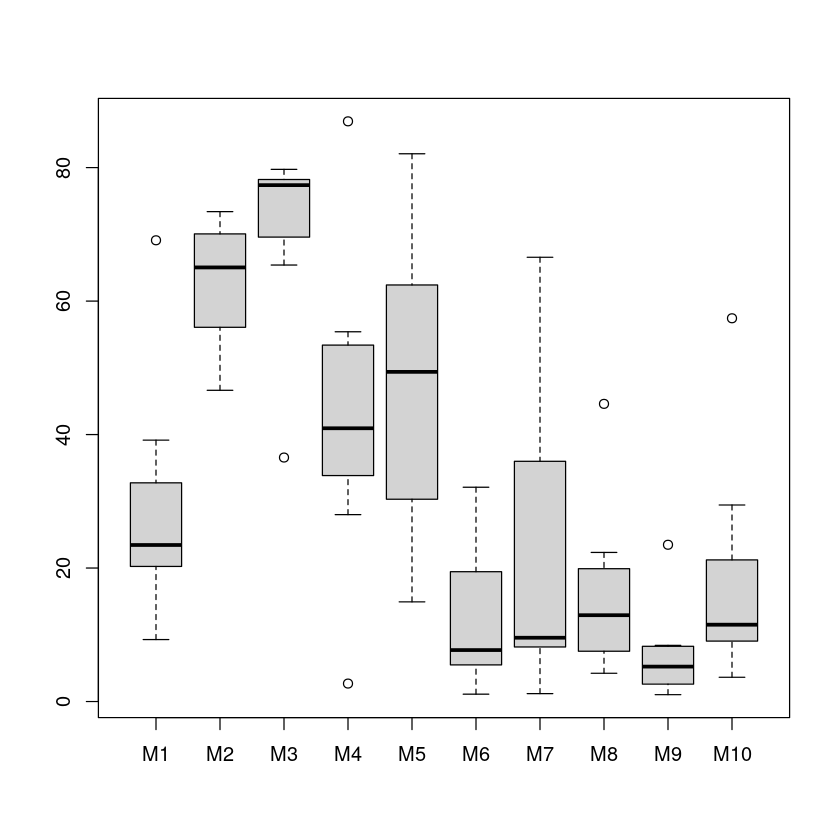

In [7]:
boxplot(data)

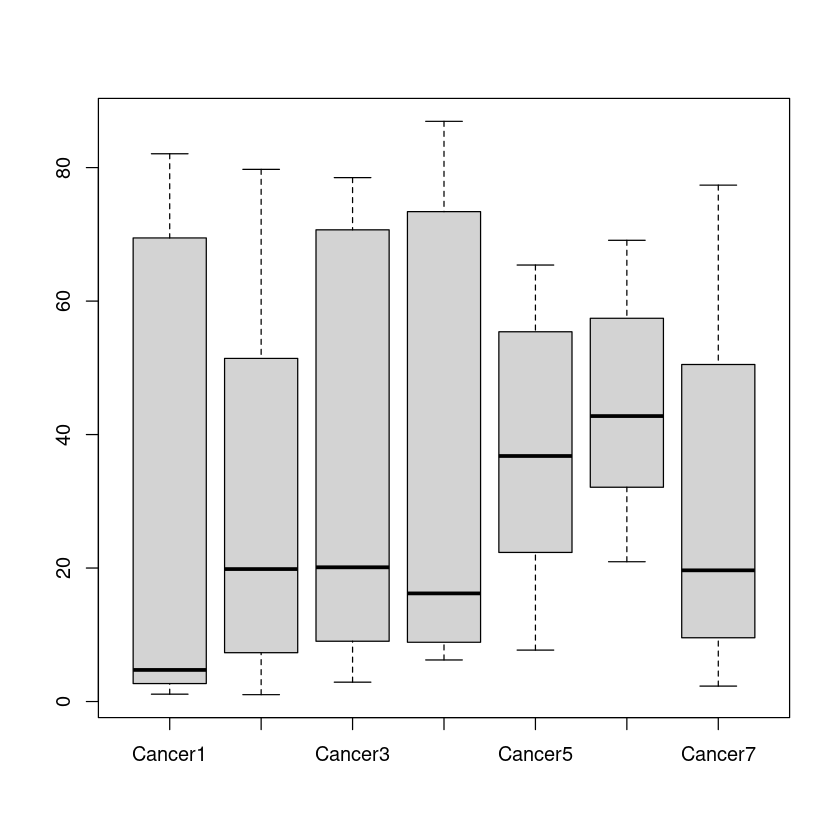

In [8]:
boxplot(t(data))

In [9]:
mat_cor <- cor(data)
mat_cor

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10
M1,1.0000000,-0.7803649,-0.95879670,-0.20347759,-0.3050915,0.6216544,0.7206783,0.8661101,0.8507322,0.95453707
M2,-0.7803649,1.0000000,0.68228746,0.24674738,0.2873297,-0.4383573,-0.4710472,-0.6666902,-0.5390768,-0.70702894
M3,-0.9587967,0.6822875,1.00000000,0.06323268,0.4648636,-0.6304978,-0.8429007,-0.9295406,-0.9600816,-0.95985667
M4,-0.2034776,0.2467474,0.06323268,1.00000000,-0.7923709,0.1534640,0.4603376,0.2521442,0.1151439,0.09449911
M5,-0.3050915,0.2873297,0.46486364,-0.79237087,1.0000000,-0.3665027,-0.8396074,-0.7187424,-0.6059731,-0.54630146
M6,0.6216544,-0.4383573,-0.63049780,0.15346399,-0.3665027,1.0000000,0.5375998,0.5950855,0.5654891,0.70124643
M7,0.7206783,-0.4710472,-0.84290065,0.46033757,-0.8396074,0.5375998,1.0000000,0.9630457,0.9248464,0.87359521
M8,0.8661101,-0.6666902,-0.92954055,0.25214423,-0.7187424,0.5950855,0.9630457,1.0000000,0.9480060,0.95694464
M9,0.8507322,-0.5390768,-0.96008163,0.11514388,-0.6059731,0.5654891,0.9248464,0.9480060,1.0000000,0.90736779
M10,0.9545371,-0.7070289,-0.95985667,0.09449911,-0.5463015,0.7012464,0.8735952,0.9569446,0.9073678,1.00000000


In [10]:
symnum(mat_cor, abbr.colnames = FALSE)

    M1 M2 M3 M4 M5 M6 M7 M8 M9 M10
M1  1                             
M2  ,  1                          
M3  B  ,  1                       
M4           1                    
M5  .     .  ,  1                 
M6  ,  .  ,     .  1              
M7  ,  .  +  .  +  .  1           
M8  +  ,  *     ,  .  B  1        
M9  +  .  B     ,  .  *  *  1     
M10 B  ,  B     .  ,  +  B  *  1  
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

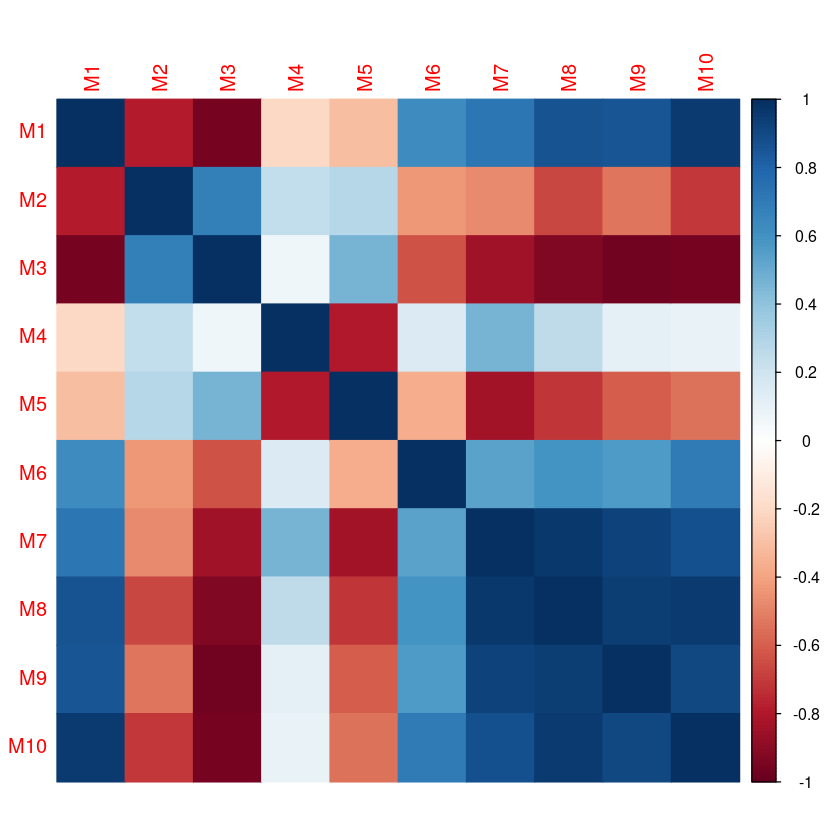

In [11]:
corrplot(mat_cor, method = "color")

In [12]:
#  on normalise les données
data_norm <- scale(data)
data_norm

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10
Cancer1,-0.3457870,0.67757459,0.2501576,-1.5804104,1.41122704,-1.0644421,-0.9533621,-0.89682772,-0.2779025,-0.8199202
Cancer2,-0.6192733,0.24884405,0.6357680,0.3025314,0.08071244,0.8214290,-0.6934040,-0.75861192,-0.8266819,-0.5215035
Cancer3,-0.3186438,0.79556422,0.5557296,-0.1497761,0.96360791,0.3404890,-0.6205661,-0.55911516,-0.5819730,-0.3212682
Cancer4,-1.0418919,1.05976467,0.5191272,1.6753071,-1.32194828,-0.6044119,0.5904317,0.05829027,0.1011253,-0.5403756
Cancer5,0.4833501,-0.08143101,-0.2904316,0.4566179,-0.31460002,-0.4719319,0.4556883,0.40950598,0.1379566,0.5558955
Cancer6,2.0118330,-1.53785492,-2.1534139,-0.1019423,-1.07713843,1.7160472,1.8195826,2.01594713,2.1064568,2.0472972
Cancer7,-0.1695872,-1.16246160,0.4830631,-0.6023276,0.25813934,-0.7371792,-0.5983704,-0.26918857,-0.6589811,-0.4001252


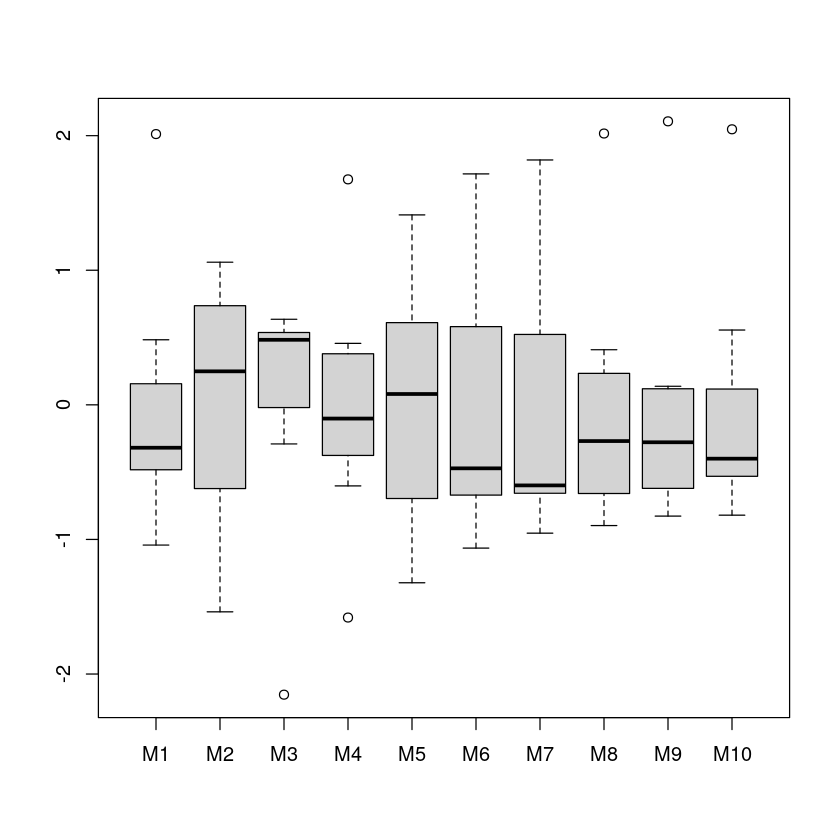

In [13]:
boxplot(data_norm)

[1]  5.899224e+00  1.661563e+00  5.142035e-01  3.981676e-01  8.649222e-02
 [6]  1.177830e-02  5.892312e-16  1.757150e-16  8.750515e-18 -1.051019e-16

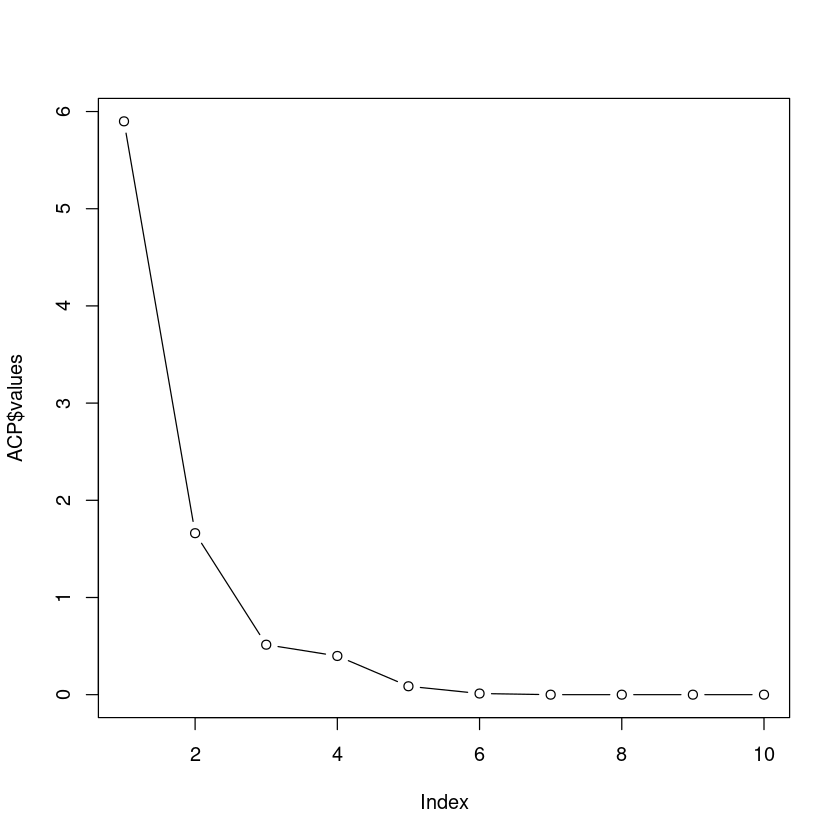

In [14]:
# Exécuter chacune des lignes suivantes et expliquer ce qu’elles font et ce que l’on obtient :
Sigma <- t(data_norm) %*% data_norm / nrow(data_norm)
ACP <- eigen(Sigma)
ACP$values
plot(ACP$values, type = "b")

In [15]:
inertie <- cumsum(ACP$values) / sum(ACP$values)
inertie

[1] 0.6882428 0.8820918 0.9420822 0.9885351 0.9986259 1.0000000 1.0000000
 [8] 1.0000000 1.0000000 1.0000000

[1]  68.82428  88.20918  94.20822  98.85351  99.86259 100.00000 100.00000
 [8] 100.00000 100.00000 100.00000

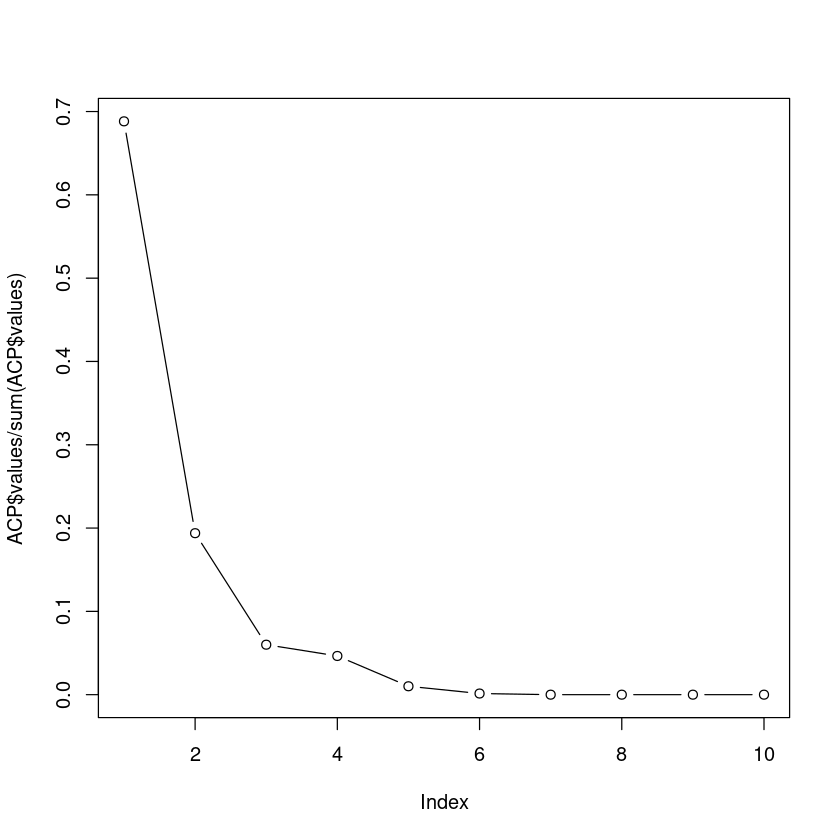

In [16]:
pourcinertie <- inertie * 100
pourcinertie
plot(ACP$values / sum(ACP$values), type = "b")

In [17]:
library(factoextra)
library(FactoMineR)

Loading required package: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [18]:
data.pca <- PCA(data_norm, graph = FALSE)

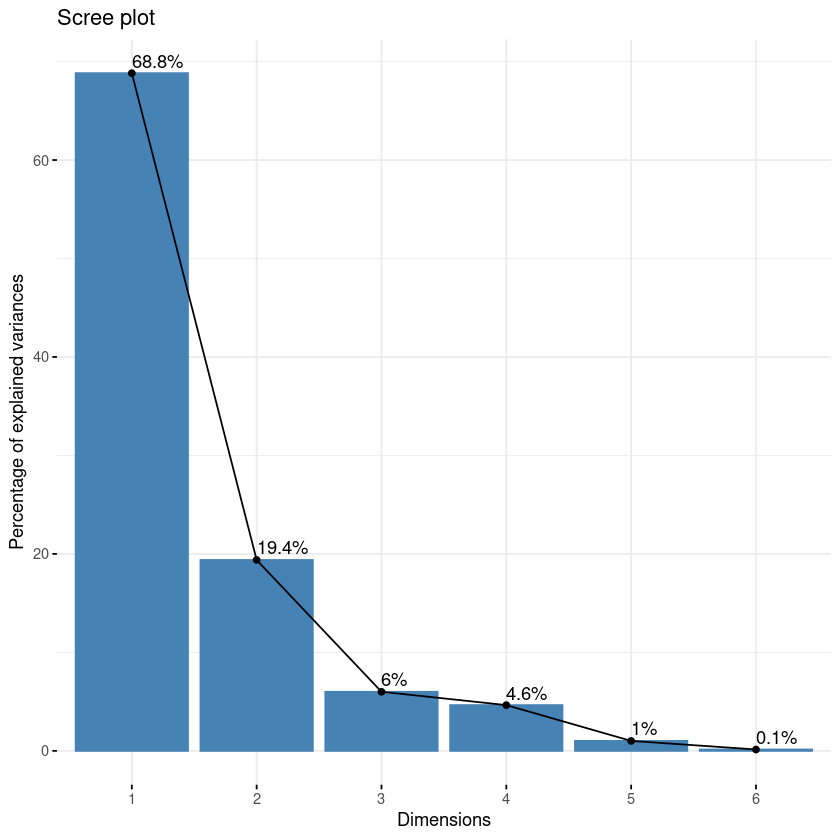

In [19]:
fviz_eig(data.pca, addlabels = TRUE)

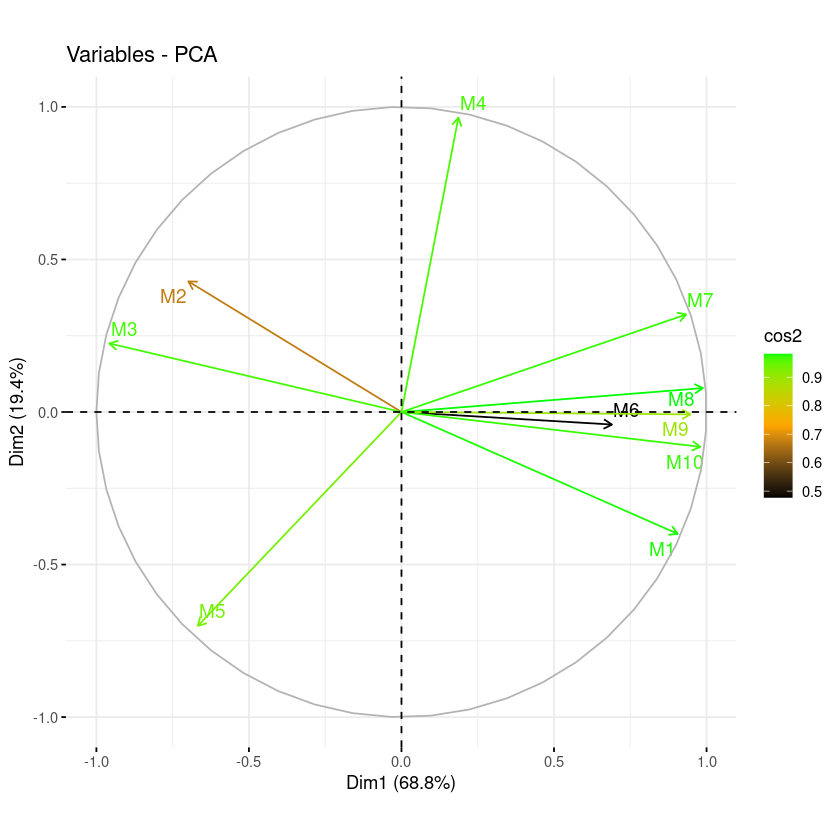

In [20]:
fviz_pca_var(data.pca,
  col.var = "cos2",
  gradient.cols = c("black", "orange", "green"),
  repel = TRUE
)


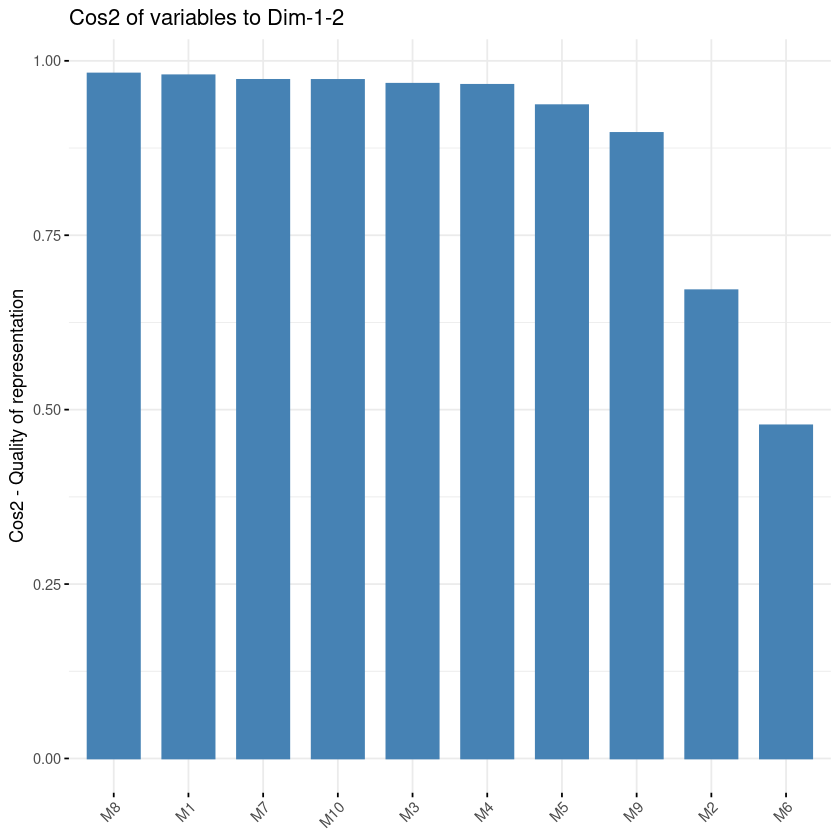

In [21]:
fviz_cos2(data.pca, choice = "var", axes = 1:2)

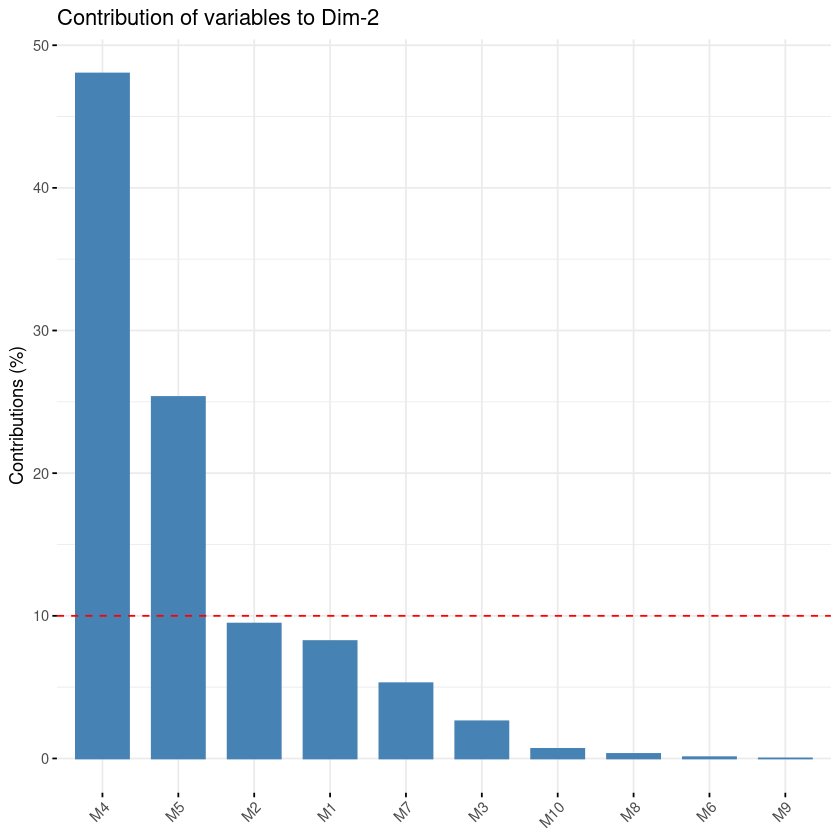

In [22]:
fviz_contrib(data.pca, choice = "var", axes = 2, top = 10)

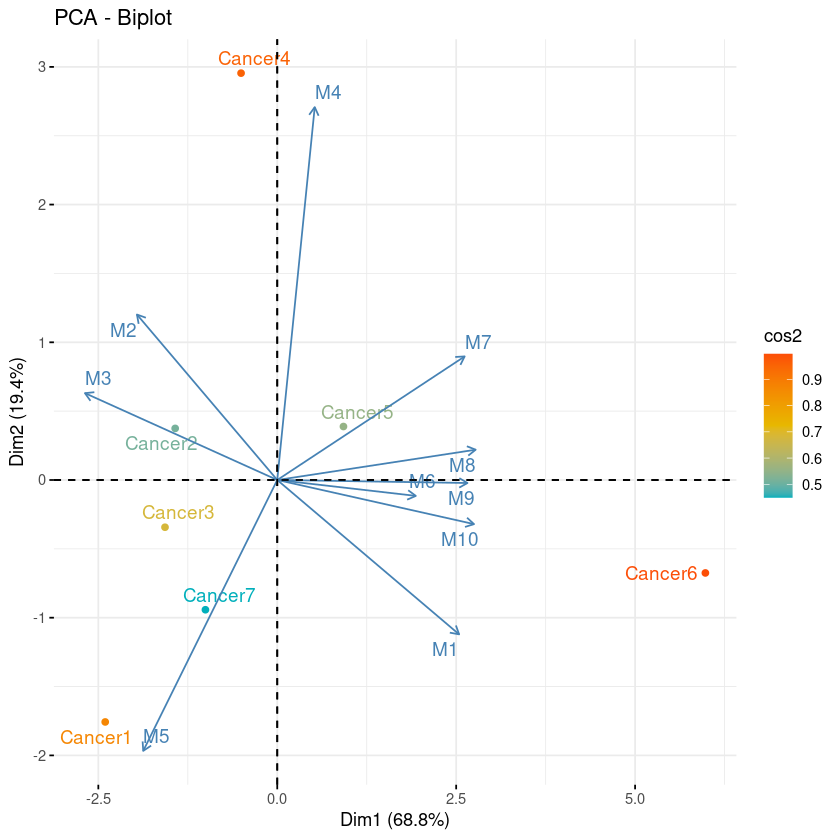

In [23]:
fviz_pca(data.pca, col.ind = "cos2",gradient.cols = c("#00AFBB", '#E7B800', "#FC4E07"), repel = TRUE)

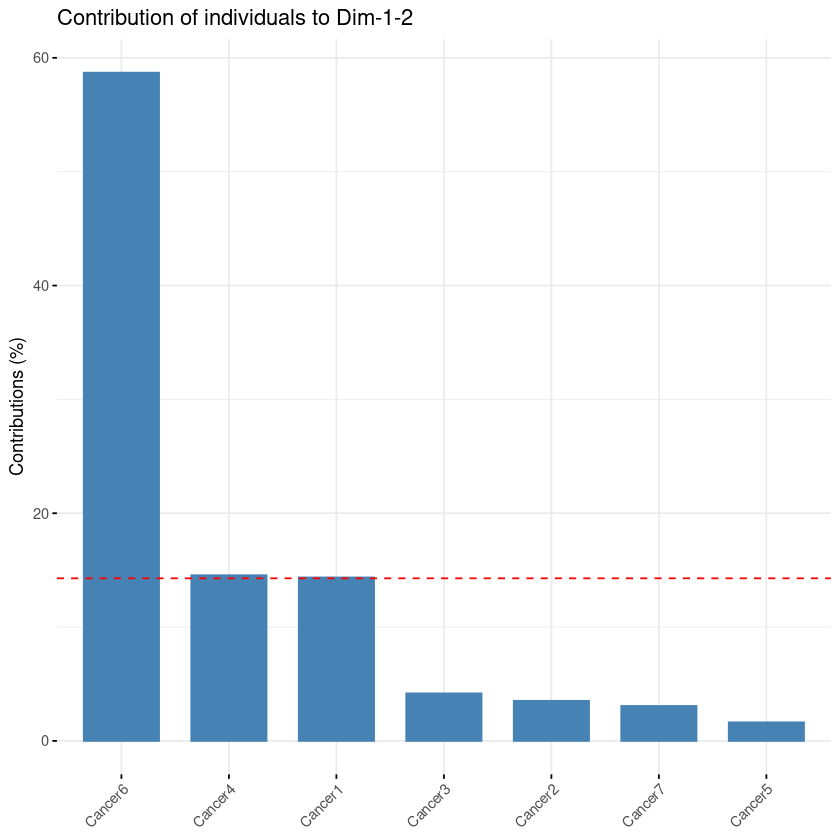

In [24]:
fviz_contrib(data.pca, choice = "ind", axes = 1:2)